# Homework 12

## Due 4PM Nov 30, 2020

## Problem 1: Women's 800 Meter

Which countries have done best at the Women's 800 Meter?

Gather the data from the World Records CSV, use a Dictionary to count the records, and create a bar chart showing the relative number of records per country.  Sort the countries alphabetically, and make sure we can read the country names.  

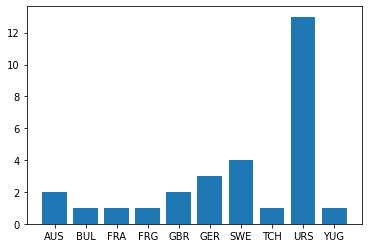

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
filename = "WorldRecords.csv"

# read in data
df = pd.read_csv(filename)

# filter to women's 800m
df2 = df[(df['Event'] =='Womens 800m')]

# create dict to count records
nats = {}
for index, row in df2.iterrows():
    if row['Nationality'] not in nats:
        nats[row['Nationality']] = 1
    else:
        nats[row['Nationality']] += 1

# create & draw chart        
nats = sorted(nats.items())
x = [k[0] for k in nats]
y = [k[1] for k in nats]

plt.bar(x,y)
plt.show()

## Problem 2: Regular Expressions

We have used Beautiful Soup to scrape a website.

Let's see what we can do with just urlib and Regular Expressions

Take the DCE website, and find all the links.  (Be sure to compare notes with Beautiful Soup)

In [40]:
import urllib.request
import string
import re

def find_links(url):
    """Returns the first URL and link txt on page"""

    # read in url text
    with urllib.request.urlopen(url) as f:
        text = f.read().decode('utf-8')
    
    re_links = re.findall(r'<a\s+.*/a>', text)    
    return re_links

## Unit Test

In [41]:
website = 'https://www.extension.harvard.edu'

In [42]:
results = find_links(website)
print("Number of links:",len(results),"\n")
for link in results:
   print(link)
    

Number of links: 59 

<a href="#main-menu" class="skip">Jump to navigation</a>
<a href="#main-content" class="skip">Skip to Main Content</a>
<a class="topbar__link" href="https://www.harvard.edu">Harvard.edu</a>
<a href="https://www.extension.harvard.edu">Harvard Extension School</a>
<a href="https://www.summer.harvard.edu">Harvard Summer School</a>
<a
              href="https://www.extension.harvard.edu/professional-development">Professional Development</a>
<a href="https://www.extension.harvard.edu/hilr">Learning In Retirement</a>
<a href="https://alumni.extension.harvard.edu/">Extension Alumni Association</a>
<a class="header__mobile-menu ir i-hamburger" data-grunticon-embed href="">Menu</a>
<a href="/academics">Academics</a>
<a href="/registration-admissions" title="Registration &amp; Admissions">Registration &amp; Admissions</a>
<a href="/resources-policies">Resources &amp; Policies</a>
<a href="https://blog.dce.harvard.edu/extension" title="">Blog</a>
<a href="/request-informati

In [44]:
import requests
from bs4 import BeautifulSoup

"prettify print the html of a given url"

url = "https://www.extension.harvard.edu"
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, 'html.parser')
pretty_soup = soup.prettify()

links = soup.find_all("a")
    

print("Number of links:",len(links),"\n")
for x in links:
    print(x)


Number of links: 62 

<a class="skip" href="#main-menu">Jump to navigation</a>
<a class="skip" href="#main-content">Skip to Main Content</a>
<a class="topbar__logo i-harvard-logo ir" href="https://dce.harvard.edu" target="_blank">
        Harvard Division of Continuing Education
      </a>
<a class="topbar__link" href="https://www.harvard.edu">Harvard.edu</a>
<a href="https://www.extension.harvard.edu">Harvard Extension School</a>
<a href="https://www.summer.harvard.edu">Harvard Summer School</a>
<a href="https://www.extension.harvard.edu/professional-development">Professional Development</a>
<a href="https://www.extension.harvard.edu/hilr">Learning In Retirement</a>
<a href="https://alumni.extension.harvard.edu/">Extension Alumni Association</a>
<a class="header__mobile-menu ir i-hamburger" data-grunticon-embed="" href="">Menu</a>
<a class="header__logo i-hes-logo" href="/" id="logo" rel="home" title="Home">
<noscript><img alt="Home" class="header__logo-image" src="https://www.extensi

## Compare your program with the results from Beautiful Soup

Do you get the same number of links?  If not:

1) How many do you miss?

2) Can you explain why you miss them?

3) Can you fix it?

In [45]:
# I do not get the same number of links. I miss three using RE: the Harvard Division of Continuing Education 
# link, the second Harvard Extension School link, and the HES logo that links back to the home page. 

# Could not quite figure out a reliable way to use RE to get the links I first miss, 
# without then missing other links I didn't miss the first time. 

# I surmise that the moral of the story is: don't use RE for URLs, use libraries that are built
# specifically for that sort of thing - such as Beautiful Soup

## Problem 3: File Name Generator

Write a Generator that takes a directory, a file extension, and, optionally, a file size, and then yields a stream of tuples, (path, filename) so that path/filename is a legal path to a file that meets the conditions.

Use os.walk(dir) to create a generator that gives all files and directories below dir.  Call this generator, and yield files (not directories) with the right extension and a file size greater than the given size.   

We have three unit tests: demonstrate that you can walk recursivly through two or more directories, and that you can filter by file extension and filter by extension and by size. 

In [46]:
import os

def find_files_gen(path, filename, filesize=0):
    matches = []
    for root,dir, files in os.walk(path):
        for f in files:
            path = os.path.join(root, f)
            size = os.stat(path).st_size
            if filename in f and size > filesize:
                yield(root, f)
    
    
gen = find_files_gen('..', 'py')
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))
print(next(gen))


('..\\.ipynb_checkpoints', 'Homework12_Surista-checkpoint.ipynb')
('..\\Day01', 'Day1.ipynb')
('..\\Day01', 'day1.py')
('..\\Day01', 'Day_01.py')
('..\\Day01', 'Day_01a.py')


## Unit Test

In [47]:
# Show recursive search.  Make sure we can see at least two directories of files
gen = find_files_gen('..', 'py',35000)

for path, filename in gen:
    print(path, filename)

..\.ipynb_checkpoints Homework12_Surista-checkpoint.ipynb
..\Day02 Day2.ipynb
..\Day04 Day4 (1).ipynb
..\Day04\.ipynb_checkpoints Day4 (1)-checkpoint.ipynb
..\Day04\.ipynb_checkpoints Day4-checkpoint.ipynb
..\Day05 Day5.ipynb
..\Day06 Day6.ipynb
..\Day06 pytext.txt
..\Day06 pywiki.txt
..\Day07 Day7.ipynb
..\Day08 CopyBox.jpg
..\Day08 Day8.ipynb
..\Day08\.ipynb_checkpoints Day8-checkpoint.ipynb
..\Day09 Iterator (1).ipynb
..\Day09\.ipynb_checkpoints Day10-checkpoint.ipynb
..\Day09\.ipynb_checkpoints Iterator-checkpoint.ipynb
..\Day10 BeautifulSoup-Lena.ipynb
..\Day10 Homework10.ipynb
..\Day10 Homework10_S_Urista.ipynb
..\Day10\.ipynb_checkpoints 2016_US_County_Level_Presidential_Results-checkpoint.ipynb
..\Day10\.ipynb_checkpoints Homework10 (4)-checkpoint.ipynb
..\Day10\.ipynb_checkpoints Homework10-checkpoint.ipynb
..\Day11 Homework11_SUrista.ipynb
..\Day11\.ipynb_checkpoints Homework11-checkpoint.ipynb
..\Day11\.ipynb_checkpoints Homework11SUrista-checkpoint.ipynb
..\Day11\.ipynb_che

In [48]:
# Show all notebooks in this directory
gen = find_files_gen('..', '.ipynb')

for path, filename in gen:
    print(path, filename)

..\.ipynb_checkpoints Homework12_Surista-checkpoint.ipynb
..\Day01 Day1.ipynb
..\Day01 E7 Day1.ipynb
..\Day01 Homework1.ipynb
..\Day01 Homework_01.ipynb
..\Day01 HW1Share.ipynb
..\Day01 HW1Share_solutions.ipynb
..\Day02 Day2.ipynb
..\Day02 Homework2.ipynb
..\Day02 HW2Share.ipynb
..\Day03 Day3.ipynb
..\Day03 Debug.ipynb
..\Day03 HW2Share_sol.ipynb
..\Day03 HW3Share.ipynb
..\Day03\.ipynb_checkpoints HW2Share_sol-checkpoint.ipynb
..\Day04 Day4 (1).ipynb
..\Day04 Homework4.ipynb
..\Day04 HW4Share.ipynb
..\Day04 PyCharmVEnv.ipynb
..\Day04\.ipynb_checkpoints Day4 (1)-checkpoint.ipynb
..\Day04\.ipynb_checkpoints Day4-checkpoint.ipynb
..\Day05 Day5.ipynb
..\Day05 homework5.ipynb
..\Day05 HW4Share (1).ipynb
..\Day05 HW5Share.ipynb
..\Day05 Solutions4 (1).ipynb
..\Day05\.ipynb_checkpoints Day5-checkpoint.ipynb
..\Day06 Day6.ipynb
..\Day06 Homework6.ipynb
..\Day06 HW5Share (2).ipynb
..\Day06\.ipynb_checkpoints Homework6_SUrista-checkpoint.ipynb
..\Day06\.ipynb_checkpoints Homework6_SUrista_new-ch

In [49]:
# Show all notebooks in this directory with at least **25K** bytes
gen = find_files_gen('..', '.ipynb', 25000)

for path, filename in gen:
    print(path, filename)

..\.ipynb_checkpoints Homework12_Surista-checkpoint.ipynb
..\Day02 Day2.ipynb
..\Day03 Day3.ipynb
..\Day04 Day4 (1).ipynb
..\Day04\.ipynb_checkpoints Day4 (1)-checkpoint.ipynb
..\Day04\.ipynb_checkpoints Day4-checkpoint.ipynb
..\Day05 Day5.ipynb
..\Day05\.ipynb_checkpoints Day5-checkpoint.ipynb
..\Day06 Day6.ipynb
..\Day06 Homework6.ipynb
..\Day07 Day7.ipynb
..\Day08 Day8.ipynb
..\Day08 Homework8.ipynb
..\Day08 While.ipynb
..\Day08\.ipynb_checkpoints Day8-checkpoint.ipynb
..\Day09 Assignment_9.ipynb
..\Day09 Iterator (1).ipynb
..\Day09\.ipynb_checkpoints Assignment_9-checkpoint.ipynb
..\Day09\.ipynb_checkpoints Day10-checkpoint.ipynb
..\Day09\.ipynb_checkpoints Iterator-checkpoint.ipynb
..\Day10 BeautifulSoup-Lena.ipynb
..\Day10 Homework10.ipynb
..\Day10 Homework10_S_Urista.ipynb
..\Day10\.ipynb_checkpoints 2016_US_County_Level_Presidential_Results-checkpoint.ipynb
..\Day10\.ipynb_checkpoints Homework10 (3)-checkpoint.ipynb
..\Day10\.ipynb_checkpoints Homework10 (4)-checkpoint.ipynb
..

## Problem 4: Sorting Employees

We wish to take an unordered list of Employees, and get a list sorted by Company and Id.

Everyone who works at 'Springfield Department of Motor Vehicles' should be in one group. 
Everyone who works at 'Springfield Nuclear Power' would be in another group, later in the list, 
and everyone who works from the Mafia would be in a group earlier in the list. 
Within each group, we want to see the low ID numbers before this high ones.

For this problem, we do not want you to write a sorting program. You will use Python's sort.   
You just need to define the magic method dunder lt(), less than, for the class Employee. 

Once you have defined dunder lt(), calling Python's sorted() on a list of Employees will return a sorted list.

### Add to the cell below

In [50]:
class Person:

    def __init__(self, first, last):
        self.firstname = first.capitalize()
        self.lastname = last.capitalize()

    def __str__(self):
        return self.firstname + " " + self.lastname


class Employee(Person):

    def __init__(self, first, last, company, id):
        # Call Superclass to set common information
        super().__init__(first, last)
        self.id = id
        self.company = company

    def __str__(self):
        # Call Superclass to dispaly common information
        return super().__str__() + ", " + str(self.id) + ' at ' + self.company
    
    def __lt__(self, other):
        "Is self less than other?"
        
        if not isinstance(other, Employee):
            return False
        return (self.company, self.id) < (other.company, other.id)

## Unit Test

In [51]:
lst = [
    Employee('Homer', 'Simpson', 'Springfield Nuclear Power', 1005),
    Employee('Barney', 'Gumble', 'Plow King', 1),
    Employee('Clancy', 'Wiggum', 'Police Department', 1),
    Employee('Edna', 'Krabapple', 'Springfield Elementary School', 39),
    Employee('Seymour', 'Skinner', 'Springfield Elementary School', 1),
    Employee('Charles', 'Burns', 'Springfield Nuclear Power', 1),
    Employee('Waylon', 'Smithers', 'Springfield Nuclear Power', 2),
    Employee('Patty', 'Bouvier', 'Springfield Department of Motor Vehicles', 39),
    Employee('Selma', 'Bouvier', 'Springfield Department of Motor Vehicles', 38),
    Employee('Robert', 'Terwilliger', 'Channel 6', 31),
    Employee('Herschel', 'Krustofsky', 'Channel 6', 2),
    Employee('Lois', 'Pennycandy', 'Channel 6', 46),
    Employee('Johnny', 'Cevasco', 'Mafia', 2),
    Employee('Fat', 'Tony', 'Mafia', 1),
    Employee('Max', 'Legman', 'Mafia', 3 ),
    Employee('Louie', 'Walters', 'Mafia', 4)
    ]

for emp in lst:
    print(emp)
    
print('==========================')

# Sort the people
lst = sorted(lst)

# Now check that the list is sorted
for first, second in zip(lst[:-1], lst[1:]):
    assert (first.company, first.id) < (second.company, second.id)

for emp in lst:
    print(emp)
    
print("\n\tSuccess!")

Homer Simpson, 1005 at Springfield Nuclear Power
Barney Gumble, 1 at Plow King
Clancy Wiggum, 1 at Police Department
Edna Krabapple, 39 at Springfield Elementary School
Seymour Skinner, 1 at Springfield Elementary School
Charles Burns, 1 at Springfield Nuclear Power
Waylon Smithers, 2 at Springfield Nuclear Power
Patty Bouvier, 39 at Springfield Department of Motor Vehicles
Selma Bouvier, 38 at Springfield Department of Motor Vehicles
Robert Terwilliger, 31 at Channel 6
Herschel Krustofsky, 2 at Channel 6
Lois Pennycandy, 46 at Channel 6
Johnny Cevasco, 2 at Mafia
Fat Tony, 1 at Mafia
Max Legman, 3 at Mafia
Louie Walters, 4 at Mafia
Herschel Krustofsky, 2 at Channel 6
Robert Terwilliger, 31 at Channel 6
Lois Pennycandy, 46 at Channel 6
Fat Tony, 1 at Mafia
Johnny Cevasco, 2 at Mafia
Max Legman, 3 at Mafia
Louie Walters, 4 at Mafia
Barney Gumble, 1 at Plow King
Clancy Wiggum, 1 at Police Department
Selma Bouvier, 38 at Springfield Department of Motor Vehicles
Patty Bouvier, 39 at Spring

## Problem 5: Finding Repeats

DNA has a great deal of structure.  DNA often contains repeats: this is a fascinating area that we are not going to explore.  Investigate 'transposons'.  
    
Write a program that finds the longest repeat in a sequence of DNA stored in a FASTA file.

There will be a single string of DNA in the file. The first line has a description of the contents,
while the remainder is a string of A, C, G, and T with line breaks.  Be sure to remove the line breaks.  

Here is a sample run on pKLMF-FX.fasta

```python
10089
(5535, 5541, 15)
CACGGGCACGGGCAC
CACGGGCACGGGCAC
CPU times: user 191 ms, sys: 2.49 ms, total: 193 ms
Wall time: 193 ms
```

In [38]:
# Read contents of fasta file with a single sequence
# Skip the first line, and return a string holding the contents

import re

def read_fasta_file(filename: str) -> str:
    with open(filename, 'r') as f:
        temp = [line.strip() for line in f]
        seq = ''.join(temp[1:])
        
    return seq

In [52]:
# Take a string and look for the longest repeat
# Return a tuple: (pos1, pos2, length) or None if there are no repeats
#    pos1 != pos2 and text[pos1:pos1+length)] == text[pos2:pos2+length]

from collections import defaultdict

def longest_repeat(text, cntr = 2):

    sol = (0,0,0)
    while True:

        d = defaultdict(list)
        for i in range(len(text)):
            d[text[i:i+cntr]].append(i)               
        del_list = [(item, d[item]) for item in d if len(item) > 1 and len(d[item]) > 1]
        if len(del_list) == 0:
            return sol
        else:
            temp = [(item[1][0], item[1][1], len(item[0])) for item in del_list]
            sol = (temp[0][0], temp[0][1], temp[0][2])
            
        cntr += 1

## Unit tests

In [53]:
%%time
filename = 'pKLMF-FX.fasta'

text = read_fasta_file(filename)
print(len(text))               
assert len(text) == 9988

tup = longest_repeat(text) 

print(tup)
assert len(tup) == 3
assert isinstance(tup, tuple)

print(text[tup[0]:tup[0]+tup[2]])
print(text[tup[1]:tup[1]+tup[2]])

assert text[tup[0]:tup[0]+tup[2]] == text[tup[1]:tup[1]+tup[2]]

9988
(5434, 5440, 15)
CACGGGCACGGGCAC
CACGGGCACGGGCAC
Wall time: 74.8 ms


In [25]:
%%time
filename = 'pACYC184.fasta'        # An EColi plasmid cloning vector

# See https://www.snapgene.com/resources/plasmid-files/?set=basic_cloning_vectors&plasmid=pACYC184
    

text = read_fasta_file(filename)
print(len(text))                   # DNA is 4289 Bytes long: remove first line and \n
assert len(text) == 4245 

tup = longest_repeat(text) 
print(tup)
assert len(tup) == 3
assert isinstance(tup, tuple)

print(text[tup[0]:tup[0]+tup[2]])
print(text[tup[1]:tup[1]+tup[2]])

assert tup[2] == 94
assert text[tup[0]:tup[0]+tup[2]] == text[tup[1]:tup[1]+tup[2]]

4245
(2180, 3274, 94)
AGCTCCTTCCGGTGGGCGCGGGGCATGACTATCGTCGCCGCACTTATGACTGTCTTCTTTATCATGCAACTCGTAGGACAGGTGCCGGCAGCGC
AGCTCCTTCCGGTGGGCGCGGGGCATGACTATCGTCGCCGCACTTATGACTGTCTTCTTTATCATGCAACTCGTAGGACAGGTGCCGGCAGCGC
Wall time: 187 ms


## Extra credit: Find the longest repeat in EColi

In [52]:
%%time
filename = 'ecoli.fasta'

text = read_fasta_file(filename)
print(len(text))
assert len(text) == 4641652

tup = longest_repeat(text, 2810)  
print(tup)

assert len(tup) == 3
assert isinstance(tup, tuple)
assert len(text) == 4641652 

print(text[tup[0]:tup[0]+tup[2]])
print(text[tup[1]:tup[1]+tup[2]])

assert text[tup[0]:tup[0]+tup[2]] == text[tup[1]:tup[1]+tup[2]]

4641652
(4168618, 4210020, 2815)
AAGAAACATCTTCGGGTTGTGAGGTTAAGCGACTAAGCGTACACGGTGGATGCCCTGGCAGTCAGAGGCGATGAAGGACGTGCTAATCTGCGATAAGCGTCGGTAAGGTGATATGAACCGTTATAACCGGCGATTTCCGAATGGGGAAACCCAGTGTGTTTCGACACACTATCATTAACTGAATCCATAGGTTAATGAGGCGAACCGGGGGAACTGAAACATCTAAGTACCCCGAGGAAAAGAAATCAACCGAGATTCCCCCAGTAGCGGCGAGCGAACGGGGAGCAGCCCAGAGCCTGAATCAGTGTGTGTGTTAGTGGAAGCGTCTGGAAAGGCGCGCGATACAGGGTGACAGCCCCGTACACAAAAATGCACATGCTGTGAGCTCGATGAGTAGGGCGGGACACGTGGTATCCTGTCTGAATATGGGGGGACCATCCTCCAAGGCTAAATACTCCTGACTGACCGATAGTGAACCAGTACCGTGAGGGAAAGGCGAAAAGAACCCCGGCGAGGGGAGTGAAAAAGAACCTGAAACCGTGTACGTACAAGCAGTGGGAGCACGCTTAGGCGTGTGACTGCGTACCTTTTGTATAATGGGTCAGCGACTTATATTCTGTAGCAAGGTTAACCGAATAGGGGAGCCGAAGGGAAACCGAGTCTTAACTGGGCGTTAAGTTGCAGGGTATAGACCCGAAACCCGGTGATCTAGCCATGGGCAGGTTGAAGGTTGGGTAACACTAACTGGAGGACCGAACCGACTAATGTTGAAAAATTAGCGGATGACTTGTGGCTGGGGGTGAAAGGCCAATCAAACCGGGAGATAGCTGGTTCTCCCCGAAAGCTATTTAGGTAGCGCCTCGTGAATTCATCTCCGGGGGTAGAGCACTGTTTCGGCAAGGGGGTCATCCCGACTTACCAACCCGATGCAAACTGCGAATACCGGAGAATGTTATCACGGGAGACA

In [15]:
# Well - technically I did indeed find the longest repeat in ecoli, although I needed to tweak things to 
# start at a higher assumed repeat string length.